In [318]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')      #for divide by zero
from __future__ import division                   #for divide by zero
import time, shutil
import sys
import matplotlib.pyplot as plt
import os, glob, pdb, math
import math 
import pandas as pd #for dataframe object

In [319]:
from astropy.io import ascii
from astropy.io import fits
from astropy import wcs

In [320]:
IsolFile = open('ddmergers_WISE.dat', 'r')
NeighFile = open('ddmergers_WISE_wneighbor.dat', 'r')
# STarFile = open('data.txt', 'r')

IsolData = IsolFile.read()
NeighFile = NeighFile.read()
# STarFile = STarFile.read()

In [321]:
target_dir = os.getcwd()
target_dir

'/Users/oyang/Downloads'

In [332]:
# Isolated data

Iid_01 = np.loadtxt(target_dir + '/ddmergers_WISE.dat', dtype=str, unpack=True,
                        skiprows=25, usecols=(5))

Iw1mpro = np.loadtxt(target_dir + '/ddmergers_WISE.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(12))
Iw1sigmpro = np.loadtxt(target_dir + '/ddmergers_WISE.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(13))

Iw2mpro = np.loadtxt(target_dir + '/ddmergers_WISE.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(16))
Iw2sigmpro = np.loadtxt(target_dir + '/ddmergers_WISE.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(17))

Iw3mpro = np.loadtxt(target_dir + '/ddmergers_WISE.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(20))
Iw3sigmpro = np.loadtxt(target_dir + '/ddmergers_WISE.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(21))

Iw1snr = np.loadtxt(target_dir + '/ddmergers_WISE.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(14))
Iw2snr = np.loadtxt(target_dir + '/ddmergers_WISE.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(18))
Iw3snr = np.loadtxt(target_dir + '/ddmergers_WISE.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(22))

# Neighbor (non-isolated) data

Nid_01 = np.loadtxt(target_dir + '/ddmergers_WISE_wneighbor.dat', dtype=str, unpack=True,
                        skiprows=25, usecols=(5))

Nw1mpro = np.loadtxt(target_dir + '/ddmergers_WISE_wneighbor.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(12))
Nw1sigmpro = np.loadtxt(target_dir + '/ddmergers_WISE_wneighbor.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(13))

Nw2mpro = np.loadtxt(target_dir + '/ddmergers_WISE_wneighbor.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(16))
Nw2sigmpro = np.loadtxt(target_dir + '/ddmergers_WISE_wneighbor.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(17))

Nw3mpro = np.loadtxt(target_dir + '/ddmergers_WISE_wneighbor.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(20))
Nw3sigmpro = np.loadtxt(target_dir + '/ddmergers_WISE_wneighbor.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(21))

Nw1snr = np.loadtxt(target_dir + '/ddmergers_WISE_wneighbor.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(14))
Nw2snr = np.loadtxt(target_dir + '/ddmergers_WISE_wneighbor.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(18))
Nw3snr = np.loadtxt(target_dir + '/ddmergers_WISE_wneighbor.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(22))

# STargets data

Sid_01 = np.loadtxt(target_dir + '/ddmergers_WISE_wneighbor.dat', dtype=str, unpack=True,
                        skiprows=25, usecols=(5))

Sw1mpro = np.loadtxt(target_dir + '/ddmergers_WISE_wneighbor.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(12))
Sw1sigmpro = np.loadtxt(target_dir + '/ddmergers_WISE_wneighbor.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(13))

Sw2mpro = np.loadtxt(target_dir + '/ddmergers_WISE_wneighbor.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(16))
Sw2sigmpro = np.loadtxt(target_dir + '/ddmergers_WISE_wneighbor.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(17))

Sw3mpro = np.loadtxt(target_dir + '/ddmergers_WISE_wneighbor.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(20))
Sw3sigmpro = np.loadtxt(target_dir + '/ddmergers_WISE_wneighbor.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(21))

Sw1snr = np.loadtxt(target_dir + '/ddmergers_WISE_wneighbor.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(14))
Sw2snr = np.loadtxt(target_dir + '/ddmergers_WISE_wneighbor.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(18))
Sw3snr = np.loadtxt(target_dir + '/ddmergers_WISE_wneighbor.dat', dtype=float, unpack=True,
                        skiprows=25, usecols=(22))

In [333]:
# Isolated robust points

i = 0
IwInd = []
while i<len(Iw1mpro):
    if (Iw1mpro[i]/Iw1sigmpro[i] > 5) and (Iw2mpro[i]/Iw2sigmpro[i] > 5) and (Iw3mpro[i]/Iw3sigmpro[i] > 5):
        IwInd.append(i)
        i+=1
    else:
        i+=1

In [334]:
# Isolated robust points
j = 0
while j<len(Iw1snr):
    if (Iw1snr[j] >= 5.) and (Iw2snr[j] >= 5.) and (Iw3snr[j] <= 5.):
        IwInd.append(j)
        j+=1
    else:
        j+=1


In [335]:
# Isolated delete duplicates

IwInd = list(dict.fromkeys(IwInd))


In [336]:
# Neighbor robust points

i = 0
NwInd = []
while i<len(Nw1mpro):
    if (Nw1mpro[i]/Nw1sigmpro[i] > 5) and (Nw2mpro[i]/Nw2sigmpro[i] > 5) and (Nw3mpro[i]/Nw3sigmpro[i] > 5):
        NwInd.append(i)
        i+=1
    else:
        i+=1


In [337]:
# Neighbor robust points

j = 0
while j<len(Nw1snr):
    if (Nw1snr[j] >= 5.) and (Nw2snr[j] >= 5.) and (Nw3snr[j] <= 5.):
        NwInd.append(j)
        j+=1
    else:
        j+=1


In [338]:
# Neighbor delete duplicates

NwInd = list(dict.fromkeys(NwInd))


In [339]:
# STargets robust points

k = 0
SwInd = []
while k<len(Sw1mpro):
    if (Sw1mpro[k]/Sw1sigmpro[k] > 5) and (Sw2mpro[k]/Sw2sigmpro[k] > 5) and (Sw3mpro[k]/Sw3sigmpro[k] > 5):
        SwInd.append(k)
        k+=1
    else:
        k+=1

In [340]:
# STargets robust points

m = 0
while m<len(Sw1snr):
    if (Sw1snr[m] >= 5.) and (Sw2snr[m] >= 5.) and (Sw3snr[m] <= 5.):
        SwInd.append(m)
        m+=1
    else:
        m+=1


In [341]:
# STargets delete duplicates

SwInd = list(dict.fromkeys(SwInd))


In [342]:
# Isolated robust points
# Is this right for the x and y values?

Iw2_w3 = Iw2mpro - Iw3mpro
Iw1_w2 = Iw1mpro - Iw2mpro

In [343]:
# Neighbor (non-isolated) robust points
# Is this right for the x and y values?

Nw2_w3 = Nw2mpro - Nw3mpro
Nw1_w2 = Nw1mpro - Nw2mpro

In [344]:
# STarget robust points
# Is this right for the x and y values?

Sw2_w3 = Sw2mpro - Sw3mpro
Sw1_w2 = Sw1mpro - Sw2mpro

<function matplotlib.pyplot.show(close=None, block=None)>

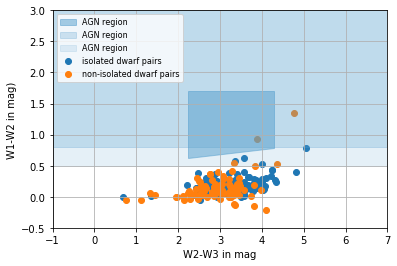

In [369]:
# define corner points

x1 = [2.245, 2.245, 4.283, 4.283]
y1 = [0.622, 1.704, 1.704, 0.786]


x2 = [-1, -1, 7, 7]
y2 = [0.8, 3, 3, 0.8]

x3 = [-1, -1, 7, 7]
y3 = [0.5, 3, 3, 0.5]

plt.xlim(-1, 7)
plt.ylim(-0.5, 3)

# plot
plt.fill(x1, y1, alpha = 0.5, color='#539ecd', label = 'AGN region')
plt.fill(x2, y2, alpha = 0.25, color='#539ecd', label = 'AGN region')
plt.fill(x3, y3, alpha = 0.15, color='#539ecd', label = 'AGN region')



plt.scatter(Iw2_w3[IwInd], Iw1_w2[IwInd], label = "isolated dwarf pairs")
plt.scatter(Nw2_w3[NwInd], Nw1_w2[NwInd], label = "non-isolated dwarf pairs")



plt.grid()
plt.xlabel("W2-W3 in mag")
plt.ylabel("W1-W2 in mag)")
plt.title("")
plt.legend(loc='upper left', prop={'size': 8})


plt.show


In [376]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

point = Point(0.5, 0.5)
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
print(polygon.contains(point))

True


In [ ]:
x1 = [2.245, 2.245, 4.283, 4.283]
y1 = [0.622, 1.704, 1.704, 0.786]


x2 = [-1, -1, 7, 7]
y2 = [0.8, 3, 3, 0.8]

x3 = [-1, -1, 7, 7]
y3 = [0.5, 3, 3, 0.5]
